<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

## Integrated Project: Understanding the yield
© ExploreAI Academy

In this coding challenge, we will apply all of the skills we learned in regression.

⚠️ **Note that this code challenge is graded and will contribute to your overall marks for this module. Submit this notebook for grading. Note that the names of the functions are different in this notebook. Transfer the code in your notebook to this submission notebook**

### Instructions

- **Do not add or remove cells in this notebook. Do not edit or remove the `### START FUNCTION` or `### END FUNCTION` comments. Do not add any code outside of the functions you are required to edit. Doing any of this will lead to a mark of 0%!**

- Answer the questions according to the specifications provided.

- Use the given cell in each question to see if your function matches the expected outputs.

- Do not hard-code answers to the questions.

- The use of StackOverflow, Google, and other online tools is permitted. However, copying a fellow student's code is not permissible and is considered a breach of the Honour code. Doing this will result in a mark of 0%.

# Introduction to Simple Linear Regression

Simple linear regression is a fundamental statistical method used to quantify the relationship between two variables. It allows us to predict an outcome (dependent variable) based on the value of one predictor (independent variable). In this challenge, we will apply simple linear regression to understand how different environmental factors affect the standardised yield of crops.

Our insights will not only help local farmers maximise their harvests but also contribute to the sustainable agriculture practices in Maji Ndogo.



# Initial data exploration

Before we sow the seeds of our regression model, we need to get to know our soil – the dataset. This dataset was developed through extensive agricultural surveys conducted at farms across Maji Ndogo. It contains various factors that might influence a farm's crop yield, from the elevation of the fields to the average temperature they bask in.

Spend some time looking at the data dictionary and start thinking about what could be influencing our crop yield.

# Data dictionary

**1. Geographic features**

- **Field_ID:** A unique identifier for each field (BigInt).
 
- **Elevation:** The elevation of the field above sea level in metres (Float).

- **Latitude:** Geographical latitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Longitude:** Geographical longitude of the field in degrees (Float). (DUMMY VARIABLE- the simulation might have created a relationship)

- **Location:** Province the field is in (Text).

- **Slope:** The slope of the land in the field (Float).

**2. Weather features**

- **Rainfall:** Amount of rainfall in the area in mm (Float).

- **Min_temperature_C:** Average minimum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Max_temperature_C:** Average maximum temperature recorded in Celsius (Float).(DUMMY VARIABLE)

- **Ave_temps:** Average temperature in Celcius (Float).

**3. Soil and crop features**

- **Soil_fertility:** A measure of soil fertility where 0 is infertile soil, and 1 is very fertile soil (Float).

- **Soil_type:** Type of soil present in the field (Text).

- **pH:** pH level of the soil, which is a measure of how acidic/basic the soil is (Float).

**4. Farm management features**

- **Field_ID:** Corresponding field identifier (BigInt).

- **Pollution_level:** Level of pollution in the area where 0 is unpolluted and 1 is very polluted (Float).

- **Plot_size:** Size of the plot in the field (Ha) (Float). (DUMMY VARIABLE)

- **Chosen_crop:** Type of crop chosen for cultivation (Text).

- **Annual_yield:** Annual yield from the field (Float). This is the total output of the field. The field size and type of crop will affect the Annual Yield (DUMMY VARIABLE - Removed)

<br>

**5. Target variable**
- **Standard_yield:** Standardised yield expected from the field, normalised per crop (Float). This is independent of field size, or crop type. Multiplying this number by the field size, and average crop yield will give the Annual_Yield.

---

Our first task is to load this dataset and peek at what sort of values each column contains. This initial glimpse will help us understand the type of data we will be working with. As you explore the data, consider the following questions:

- How many different fields are we examining?
- Are there any features that you think may be having an impact on the crop yield produced by different farms?

**Your task**
1. Load the dataset into a pandas DataFrame.
2. Display the first five rows to understand what you're working with.
3. Check the shape of the DataFrame to see how extensive our data is.

In [1]:
# Insert your code here
# Load the dataset
import pandas as pd
file_path = 'https://raw.githubusercontent.com/JackronyK/Machine_Learning/main/Regression/Challenger%20%26%20Exam/MD_agric_df.csv'  # Replace with your file path
dataset = pd.read_csv(file_path)

# Display the first five rows
dataset.head()

# Check the shape of the DataFrame
print(dataset.shape)
dataset.head()

(5654, 19)


,Unnamed: 0,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,0.085267,1.3,0.751354,cassava,0.577964
1,1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,0.399684,2.2,1.069865,cassava,0.486302
2,2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,0.358029,3.4,2.208801,tea,0.649647
3,3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,0.286687,2.4,1.277635,cassava,0.532348
4,4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,0.043190,1.5,0.832614,wheat,0.555076


In [94]:
# Model solution
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/JackronyK/Machine_Learning/main/Regression/Challenger%20%26%20Exam/MD_agric_df.csv'  # Replace with your file path
dataset = pd.read_csv(file_path)

# Display the first five rows
dataset.head()

# Check the shape of the DataFrame
print(dataset.shape)
dataset.head()

(5654, 19)


,Unnamed: 0,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Crop_type,Annual_yield,Standard_yield
0,0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,0.085267,1.3,0.751354,cassava,0.577964
1,1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,0.399684,2.2,1.069865,cassava,0.486302
2,2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,0.358029,3.4,2.208801,tea,0.649647
3,3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,0.286687,2.4,1.277635,cassava,0.532348
4,4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,0.043190,1.5,0.832614,wheat,0.555076


In [95]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/JackronyK/Machine_Learning/main/Regression/Challenger%20%26%20Exam/MD_agric_df.csv'  # Replace with your file path
MD_agric_df = pd.read_csv(file_path)
MD_agric_df = MD_agric_df.drop(['Unnamed: 0'],axis=1)
MD_agric_df = MD_agric_df.rename(columns = {'Standard_Yield':'Standard_yield'})

MD_agric_df.rename(columns={'Annual_yield': 'Crop_type_Temp', 'Crop_type': 'Annual_yield'}, inplace=True)
MD_agric_df.rename(columns={'Crop_type_Temp': 'Crop_type'}, inplace=True)
MD_agric_df['Elevation'] = MD_agric_df['Elevation'].abs()

# Correcting 'Crop_type' column
def correct_crop_type(crop):
    crop = crop.strip()  # Remove trailing spaces
    corrections = {
        'cassaval': 'cassava',
        'wheatn': 'wheat',
        'teaa': 'tea'
    }
    return corrections.get(crop, crop)  # Get the corrected crop type, or return the original if not in corrections

# Apply the correction function to the Crop_type column
MD_agric_df['Crop_type'] = MD_agric_df['Crop_type'].apply(correct_crop_type)
df = MD_agric_df

df.head()


,Field_ID,Elevation,Latitude,Longitude,Location,Slope,Rainfall,Min_temperature_C,Max_temperature_C,Ave_temps,Soil_fertility,Soil_type,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Standard_yield
0,40734,786.05580,-7.389911,-7.556202,Rural_Akatsi,14.795113,1125.2,-3.1,33.1,15.00,0.62,Sandy,6.169393,0.085267,1.3,0.751354,cassava,0.577964
1,30629,674.33410,-7.736849,-1.051539,Rural_Sokoto,11.374611,1450.7,-3.9,30.6,13.35,0.64,Volcanic,5.676648,0.399684,2.2,1.069865,cassava,0.486302
2,39924,826.53390,-9.926616,0.115156,Rural_Sokoto,11.339692,2208.9,-1.8,28.4,13.30,0.69,Volcanic,5.331993,0.358029,3.4,2.208801,tea,0.649647
3,5754,574.94617,-2.420131,-6.592215,Rural_Kilimani,7.109855,328.8,-5.8,32.2,13.20,0.54,Loamy,5.328150,0.286687,2.4,1.277635,cassava,0.532348
4,14146,886.35300,-3.055434,-7.952609,Rural_Kilimani,55.007656,785.2,-2.5,31.0,14.25,0.72,Sandy,5.721234,0.043190,1.5,0.832614,wheat,0.555076


# Analysis

## Challenge 1: Visualising the relationship

With our data ready and loaded, it's time to start exploring. 

Our goal is to determine whether any of the features in our dataset are influencing the `Standard_yield` of a farm. If we can figure out what these relationships are, then we can use them to start predicting what future yields will be, based on these features. 

For this analysis, we want to find whether any features have a linear relationship with `Standard_yield` so that we can fit a linear regression model to the data. This is important because if we try and fit a linear regression model to non-linear data, our predictions will not be very good.

We have many features in our dataset that could potentially be having an impact on `Standard_yield`. To begin unraveling this mystery, let's start by looking at `Ave_temps`, the average temperature of the region, and its relationship to `Standard_yield`.

Let's start with the basics: a scatter plot.


**Your task**
Create a function named `temp_yield_correlation` that:
1. Takes a DataFrame and the names of the average temperature column (`Ave_temps`) and the standard yield column (`Standard_yield`) as parameters.
2. Generates a scatter plot to visualise the relationship between average temperature and standard yield.
3. Calculates the Pearson correlation coefficient between these two variables to quantify their linear relationship.
4. Returns the Pearson correlation coefficient.
5. Reflect on the scatter plot. Does suggest a linear relationship, or is the story more complex?

**Note:**
- Use matplotlib for plotting the scatter plot.
- Use scipy or numpy to calculate the Pearson correlation coefficient.
- Ensure your function returns the Pearson correlation coefficient as a float.

In [33]:
# Your code here
# Hint: Use matplotlib for plotting and scipy or numpy for calculating the correlation coefficient

import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd 
import numpy as np
### START FUNCTION
def temp_yield_correlation(df, temp_col, yield_col):
    # Insert your code here


    #Plotting 
    X = df[temp_col]
    Y = df[yield_col]

    plt.scatter(X,Y)

    #Labelling our axis
    plt.xlabel('Average Temperatures [degress celcius]')
    plt.ylabel('Standard Yield []')

    #Title 
    plt.title(f'Relation between {temp_col} and {yield_col}')
    plt.show()

    #Calculate the Pearsoon Correlation Coefficient
    corr_coef = np.corrcoef(X,Y)
    
    return corr_coef[0,1]
### END FUNCTION



Input:

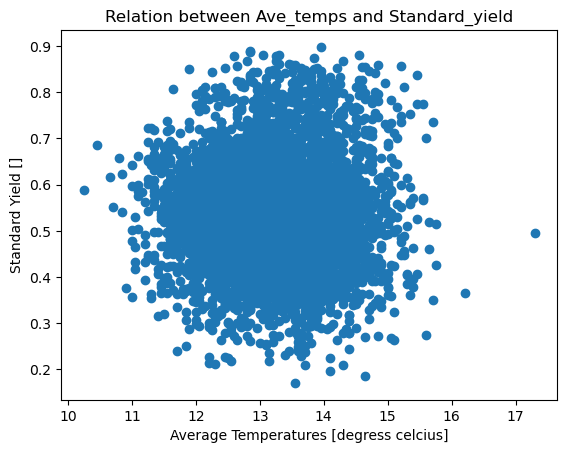

0.006785950289020185


In [34]:
correlation = temp_yield_correlation(df, 'Ave_temps', 'Standard_yield')
print(correlation)

Expected output
```
Correlation: 0.006785950289020164
```

What do you notice about the scatter plot? There seems to be a wide dispersion of data points, suggesting that there's no clear linear relationship. It's essential to visualise our data first; if the data doesn't follow a linear pattern, then a linear regression model may fail to accurately capture the underlying relationship.

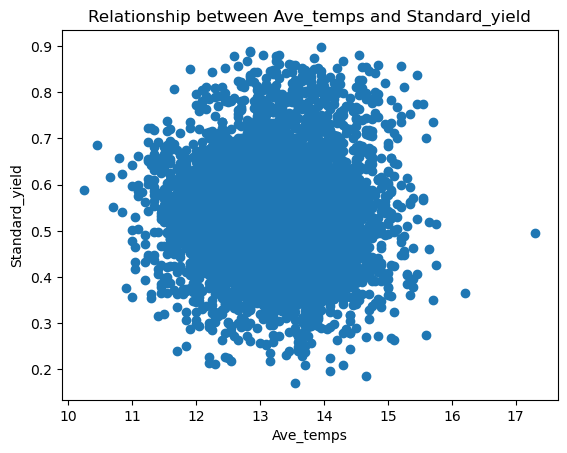

Pearson correlation coefficient: 0.006785950289020164


In [9]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def temp_yield_correlation(df, temp_col='Ave_temps', yield_col='Standard_yield'):
    """
    Visualizes the relationship between average temperature and standard yield in a scatter plot,
    calculates the Pearson correlation coefficient, and returns this coefficient.

    Parameters:
    - df: DataFrame containing the data.
    - temp_col: Name of the column representing average temperature ('Ave_temps').
    - yield_col: Name of the column representing standard yield ('Standard_yield').

    Returns:
    - The Pearson correlation coefficient as a float.
    """
    # Generate scatter plot
    plt.scatter(df[temp_col], df[yield_col])
    plt.xlabel(temp_col)
    plt.ylabel(yield_col)
    plt.title(f'Relationship between {temp_col} and {yield_col}')
    plt.show()
    
    # Calculate Pearson correlation coefficient
    correlation, _ = pearsonr(df[temp_col], df[yield_col])
    
    return correlation

# Usage example 
correlation = temp_yield_correlation(dataset)
print("Pearson correlation coefficient:", correlation)


## Challenge 2: A breath of fresh data: pollution as a predictor


It's time to shift our gaze from the warmth of the sun to the haze of pollution. Could the levels of pollution, a concern for farmers and environmentalists alike, be an indicator of our yields?

Let's visualise the relationship between pollution and crop yields and build a simple linear regression model. 

**Your task**
1. Create a function named pollution_yield_relationship that takes in a DataFrame and the names of the 'Pollution_level' and 'Standard_yield' columns.
2. The function should generate a scatter plot to visualise the relationship and also fit a linear regression model.
3. The function should return the slope and intercept of the fitted model as a tuple.
4. Use the function to analyse the Pollution_level against Standard_yield.

In [63]:
# Your code here
# Hint: Use matplotlib for plotting and sklearn's LinearRegression for modeling

### START FUNCTION
def pollution_yield_relationship(df, pollution_col, yield_col):
    # Insert your code here
    import numpy as np 
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    import pandas as pd

    #Plotting
    X = df[[pollution_col]]
    Y = df[yield_col]
    #Fittitng a Simple Linear Regression
    lm = LinearRegression()
    model = lm.fit(X,Y)
    y_pred = model.predict(X)

    plt.scatter(X,Y, label = "Data Points", color = "brown")
    plt.plot(X, y_pred, color = "navy", label = "Regression Line")

    # labelling
    plt.xlabel(pollution_col)
    plt.ylabel(yield_col)
    plt.title(f'Relationship between {pollution_col} and {yield_col}')
    plt.legend()
    plt.show()




    
    #Extracting slope and intercept
    m = model.coef_[0]
    c = model.intercept_

    return tuple([m,c])
### END FUNCTION


Input:

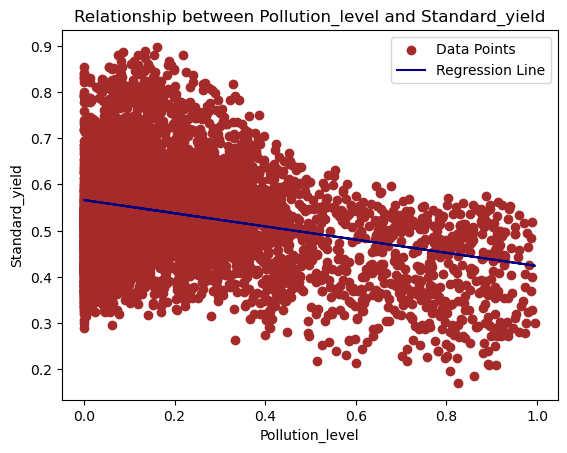

Slope: -0.14276177209866076
Intercept: 0.566268441539338


In [64]:
slope_intercept = pollution_yield_relationship(df, 'Pollution_level', 'Standard_yield')
print("Slope:", slope_intercept[0])
print("Intercept:", slope_intercept[1])

Expected output:
```
Slope: -0.1427617720986604
Intercept: 0.5662684415393379
```

/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarn

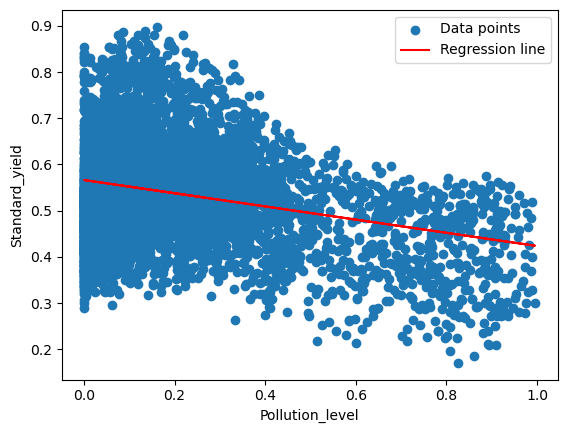

Slope: -0.1427617720986604
Intercept: 0.5662684415393379


In [12]:
# Model solution
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

### START FUNCTION
def pollution_yield_relationship(df, pollution_col, yield_col):
    X = df[[pollution_col]]
    y = df[yield_col]
    
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    
    plt.scatter(X, y, label='Data points')
    plt.plot(X, predictions, color='red', label='Regression line')
    plt.xlabel(pollution_col)
    plt.ylabel(yield_col)
    plt.legend()
    plt.show()
    
    return (model.coef_[0], model.intercept_)
### END FUNCTION

slope_intercept = pollution_yield_relationship(dataset, 'Pollution_level', 'Standard_yield')
print("Slope:", slope_intercept[0])
print("Intercept:", slope_intercept[1])

Reflect on the difference between this plot and the previous one with temperature. Is the relationship between pollution and yield more linear?

## Challenge 3: The haze clears: Evaluating pollution's predictive power

When we look at how `Standard_yield` lines up with `Ave_temps` and `Pollution_level` visually, it appears that pollution level might have a more linear relationship with yield.  This means that we could potentially use a simple linear regression model to make predictions about the yield of a farm based on its pollution level. However, before we do this we need to assess the strength of the bridge we've built between `Pollution_level` and `Standard_yield`. Does it stand firm, supported by the pillars of statistical validation, or does it sway in the winds of variability?

Let's assess our model's performance using R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

**Your task:**
Create a function named evaluate_pollution_model that:
- Takes a DataFrame as input.
- Trains a simple linear regression model using Pollution_level as the predictor for the entire dataset.
- Calculates and returns the R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) of the model's performance.

**Note:**

1. Use the LinearRegression class from sklearn.linear_model to train your model.
2. Calculate the model's performance metrics using the entire dataset.
3. Return the evaluation metrics as a tuple in the order: (R-squared, MAE, MSE, RMSE).

In [70]:
# Your code here
# Hint: You'll need sklearn's metrics and model_selection modules, in addition to LinearRegression

### START FUNCTION
def evaluate_pollution_model(df):
    # Insert your code here
    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    X = df[['Pollution_level']]
    Y = df['Standard_yield']

    #Fitting the model
    model = LinearRegression().fit(X,Y)

    y_pred = model.predict(X)

    # Getting the Metrics
    r2 = metrics.r2_score(Y, y_pred)
    mae = metrics.mean_absolute_error(Y, y_pred)
    mse = metrics.mean_squared_error(Y, y_pred)
    rmse = np.sqrt(mse)

    return tuple([r2, mae, mse, rmse])
### END FUNCTION

Input:

In [66]:
evaluation_metrics = evaluate_pollution_model(df)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")

Evaluation Metrics:
R-squared: 0.08165932890115546
MAE: 0.08554642090904993
MSE: 0.011477732254034848
RMSE: 0.10713417873878928


A tuple containing numerical values for R-squared, MAE, MSE, and RMSE:

```python
R-squared: 0.08165932890115546
MAE: 0.08554642090904992
MSE: 0.011477732254034848
RMSE: 0.10713417873878928

```

What do these metrics tell us about our model's accuracy and reliability?

In [76]:
# Your code here
# Hint: You'll need sklearn's metrics and model_selection modules, in addition to LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
### START FUNCTION
def evaluate_pollution_model(df):
    x = df[["Pollution_level"]]
    y = df["Standard_yield"]
   
    #fitting our model
    lm = LinearRegression()
    fitted_model = lm.fit(x,y)
    m = fitted_model.coef_[0]
    c = fitted_model.intercept_
    y_predict = fitted_model.predict(x)
    r2 = metrics.r2_score(y, y_predict)
    mae = metrics.mean_absolute_error(y,y_predict)
    mse = metrics.mean_squared_error(y, y_predict)
    rmse = np.sqrt(mse)
    return  r2, mse, mae, rmse

evaluation_metrics = evaluate_pollution_model(dataset)
print(f"Evaluation Metrics:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")



Evaluation Metrics:
R-squared: 0.08165932890115546
MAE: 0.011477732254034848
MSE: 0.08554642090904993
RMSE: 0.10713417873878928


## Challenge 4: The dividing line: Train-test split in action

As we delve deeper into the relationship between `Pollution_level` and `Standard_yield`, we must ensure our model is not merely memorising the data but truly understanding it. This brings us to the pivotal technique of Train-Test Split.

**The importance of train-test split**
Imagine teaching a student for an exam by using the very questions that will appear on it. They might score perfectly, but does it mean they've truly learned? Similarly, a model might perform exceptionally on the data it was trained on, but the real test of knowledge comes from unseen data. This is where the train-test split comes in, allowing us to assess our model's generalisation capabilities by training on one subset of data and testing on another.

**Your task**
Create a function named `train_test_split_evaluate` that:
1. Takes in the DataFrame.
2. Separates it into features (`X`) based on `Pollution_level` and the target (`y`) based on `Standard_yield`.
3. Splits the data into training and testing sets using an 80-20 split and sets random_state to 42 for reproducibility.
4. Trains a simple linear regression model on the training set.
5. Evaluates the model on the test set, calculating the R-squared, MAE, MSE, and RMSE.
6. Returns a tuple containing these evaluation metrics as well as two variables: `predictions` that contains the predicted values generated by the linear regression model and `y_test` that contains the actual values of the dependent variable. (These two variables will be used in the next challenge). 

**Note:**
- Use `train_test_split` from `sklearn.model_selection` to split the data.
- Train a linear regression model on the training set using `LinearRegression` from `sklearn.linear_model`.
- Calculate the evaluation metrics on the test set using functions from `sklearn.metrics`.
- Return a tuple that includes both the evaluation metrics (as a sub-tuple) and the `predictions` and `y_test` (as another sub-tuple). 
- Reflect on the differences in model performance between training and testing sets and what this indicates about the model's generalisation capability.

In [78]:
# Your code here
# Hint: You'll need sklearn's train_test_split function

### START FUNCTION
def train_test_split_evaluate(df):
    # Insert your code here
    import numpy as mp
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    from sklearn.model_selection import train_test_split

    X = df[['Pollution_level']]
    y = df['Standard_yield']


    #Splilling the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modell fitting 
    model = LinearRegression().fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    #Model Evaluations
    r2 = metrics.r2_score(y_test, y_pred_test)
    mae = metrics.mean_absolute_error(y_test, y_pred_test)
    mse = metrics.mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)

    return tuple([r2, mae, mse, rmse]),tuple([y_pred_test, y_test])
    
### END FUNCTION

Input:

In [79]:
evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(df)

print(f"Evaluation Metrics on Test Set:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")


Evaluation Metrics on Test Set:
R-squared: 0.08065722992150848
MAE: 0.08794942119747501
MSE: 0.012250634233355656
RMSE: 0.11068258324305436


Expected output: 
```
A tuple containing your evaluation metrics (R-squared, MAE, MSE, RMSE) and another tuple with predictions and y_test

Evaluation Metrics on Test Set:
R-squared: 0.08065722992150859
MAE: 0.08794942119747501
MSE: 0.012250634233355654
RMSE: 0.11068258324305434
```

Reflecting on these outputs, consider how splitting the data allows us to validate our model's performance on unseen data. By training and testing on different sets, we can better assess the model's ability to generalise, ensuring it's not just memorising the data but learning from it.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def train_test_split_evaluate(df):
    # Splitting the data
    X = df[['Pollution_level']]
    y = df['Standard_yield']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Making predictions
    predictions = model.predict(X_test)
    
    # Evaluating the model
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    # Returning both evaluation metrics and the necessary data for Challenge 5
    return (r2, mae, mse, rmse), (predictions, y_test)

evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(dataset)

print(f"Evaluation Metrics on Test Set:\nR-squared: {evaluation_metrics[0]}\nMAE: {evaluation_metrics[1]}\nMSE: {evaluation_metrics[2]}\nRMSE: {evaluation_metrics[3]}")


Evaluation Metrics on Test Set:
R-squared: 0.08065722992150859
MAE: 0.08794942119747501
MSE: 0.012250634233355654
RMSE: 0.11068258324305434


/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/sarahblewett/anaconda3/envs/ExploreDS/lib/python3.11/site-packages/sklearn/utils/validation.py:757: FutureWarn

## Challenge 5: Diagnosing model fit through residual analysis

Just like our examination of Ave_temps revealed its limitations as a predictor in a linear model due to the scatter plot distribution, there are other crucial assumptions we need to verify to ensure our model is well-fitted. Residual analysis plays a pivotal role in diagnosing the fit of linear regression models, helping us understand whether the assumptions of linearity, independence, and homoscedasticity (constant variance) of residuals are met.

**Your task:**

Create a function named analyse_model_residuals that:
1. Use the predictions and y_test obtained from Challenge 4 to calculate the residuals.
2. Plot these residuals to assess their distribution and identify any patterns.
3. Calculate the mean and standard deviation of the residuals, providing further insights into the model's performance.
4. Reflect on what the residual analysis reveals about your model's accuracy and its assumptions.

**Note:**

- Begin by extracting `predictions` and `y_test` from the output of your function from Challenge 4.
- Calculate the residuals as the difference between `y_test` and `predictions`.
- Visualise the residuals in a histogram or scatter plot against the predicted values.
- Return the mean and standard deviation of the residuals.

Mean of Residuals: 0.005858023192321707
std Residuals:0.11052745268770957 


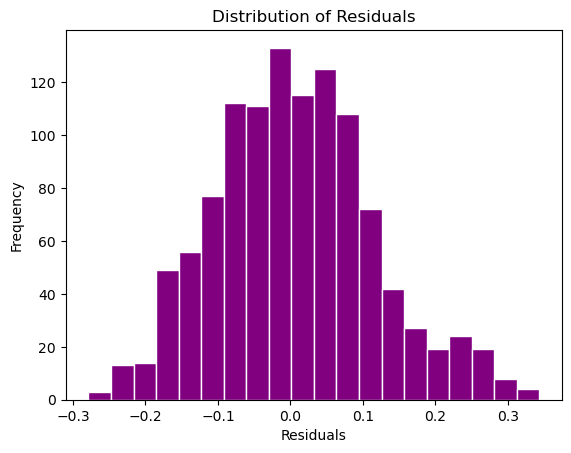

In [90]:
### START FUNCTION

def analyse_model_residuals(predictions, y_test):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    # Insert your code here
    #residuals calculations

    residuals = y_test - predictions
    #Plotting
    
    plt.hist(residuals,bins=20 ,color="Purple", edgecolor = "White")
    plt.title("Distribution of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    # Mean
    res_mean = np.mean(residuals)
    res_std = np.std(residuals)   

    return res_mean,res_std

evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(df)

mean_residual, std_residual = analyse_model_residuals(predictions, y_test)
print(f'Mean of Residuals: {mean_residual}\nstd Residuals:{std_residual} ')
### END FUNCTION

Input:

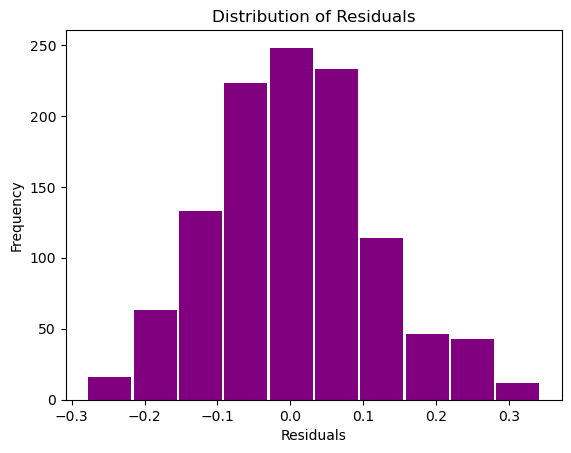

In [85]:
# Output from Challenge 4
evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(df)

mean_residual, std_residual = analyse_model_residuals(predictions, y_test)




Expected output: 
```
Visualization (e.g., histogram) showing the distribution of residuals.
Mean and standard deviation of the residuals.
```

Reflecting on these outputs, consider how splitting the data allows us to validate our model's performance on unseen data. By training and testing on different sets, we can better assess the model's ability to generalise, ensuring it's not just memorising the data but learning from it.

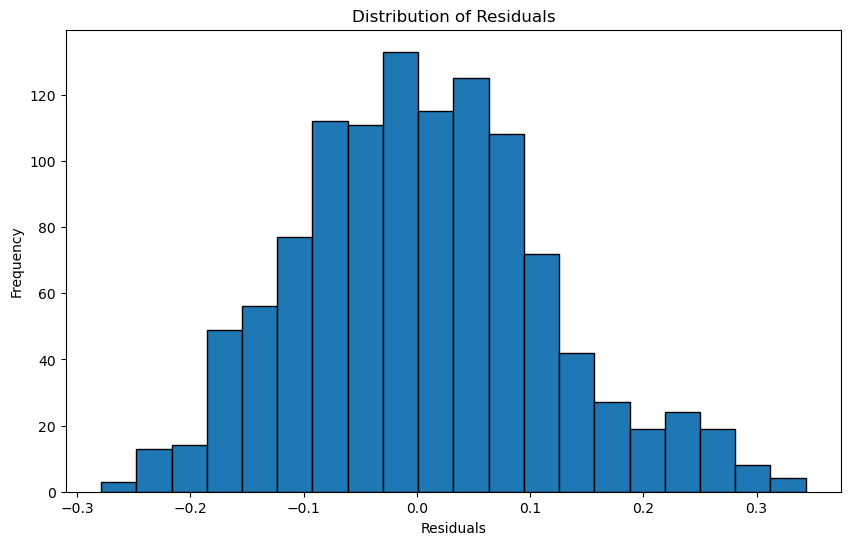

Mean of Residuals: 0.005858023192321707
std Residuals:0.11052745268770957 


In [88]:
import matplotlib.pyplot as plt

def analyse_model_residuals(predictions, y_test):
    # Calculating residuals
    residuals = y_test - predictions
    
    # Plotting the residuals
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    # Alternatively, for a scatter plot of residuals vs. predicted values:
    # plt.scatter(predictions, residuals)
    # plt.title('Residuals vs. Predicted Values')
    # plt.xlabel('Predicted Values')
    # plt.ylabel('Residuals')
    # plt.axhline(y=0, color='r', linestyle='--')
    
    # Calculating and returning the mean and standard deviation of residuals
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals)
    
    return mean_residual, std_residual

evaluation_metrics, (predictions, y_test) = train_test_split_evaluate(dataset)

mean_residual, std_residual = analyse_model_residuals(predictions, y_test)

print(f'Mean of Residuals: {mean_residual}\nstd Residuals:{std_residual} ')


## Conclusion

Linear regression, for all its strengths, assumes a straightforward relationship between the predictor and the outcome. Yet, the natural world seldom adheres to such simplicity. Factors influencing crop yields in Maji Ndogo—be it temperature, rainfall, or pollution—interact in complex, often nonlinear ways. Our initial model with Ave_temps hinted at this complexity, suggesting that the effect of the average temperature on yields might follow a more intricate pattern than a straight line can depict.

As we dive deeper into regression, it's crucial to remember that with each model comes a new perspective. Just as a farmer selects the tool that best suits the task at hand, so must we choose our models with intention and insight. Exploring beyond linear regression opens up new vistas of understanding, allowing us to capture the richness of relationships within our data.

In the fields of Maji Ndogo and beyond, countless stories await. It's up to us, with curiosity as our guide and an ever-expanding array of models at our disposal, to uncover them.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>